<a href="https://colab.research.google.com/github/AsmaSENDJAKEDDINE/AI/blob/main/maps.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Entrez le nom de la ville de départ : amizour
Entrez le nom de la ville d'arrivée : bejaia
🌍 Téléchargement des données pour la région...
✅ Calcul du chemin le plus court...


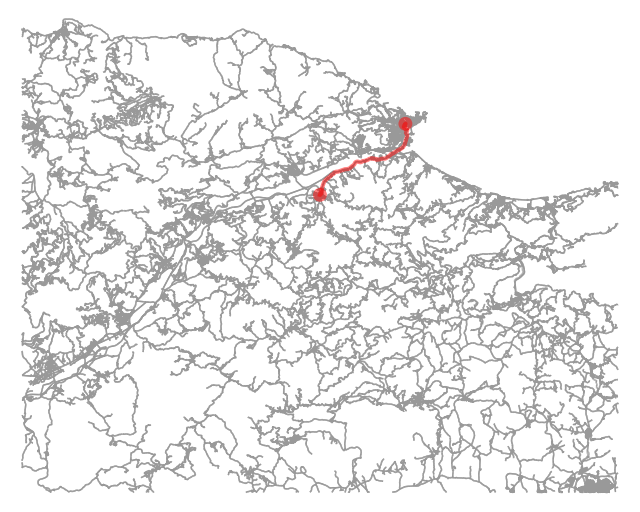

In [ ]:
import osmnx as ox
import networkx as nx
import requests
import matplotlib.pyplot as plt
import gc  # Importer le garbage collector

def get_coordinates(city_name):
    """ Récupère les coordonnées GPS d'une ville en Algérie via OpenStreetMap """
    url = f"https://nominatim.openstreetmap.org/search?format=json&q={city_name}, Algeria"
    headers = {"User-Agent": "Mozilla/5.0"}  # Évite le blocage OSM
    response = requests.get(url, headers=headers)

    if response.status_code == 200 and response.json():
        location = response.json()[0]
        return float(location["lat"]), float(location["lon"])
    else:
        print(f"⚠️ Ville non trouvée : {city_name}")
        return None

# ✅ Entrée utilisateur
start_city = input("Entrez le nom de la ville de départ : ")
end_city = input("Entrez le nom de la ville d'arrivée : ")

# ✅ Récupération des coordonnées
start_coords = get_coordinates(start_city)
end_coords = get_coordinates(end_city)

if start_coords and end_coords:
    print("🌍 Téléchargement des données pour la région...")

    # ✅ Charger un graphe plus petit autour des villes (50 km au lieu de 100 km)
    try:
        graph = ox.graph_from_point(start_coords, dist=50000, network_type="drive", simplify=False, retain_all=False)

        # ✅ Vérifier et nettoyer la RAM après chargement des données
        gc.collect()

        # ✅ Trouver les nœuds les plus proches
        start_node = ox.distance.nearest_nodes(graph, X=start_coords[1], Y=start_coords[0])
        end_node = ox.distance.nearest_nodes(graph, X=end_coords[1], Y=end_coords[0])

        # ✅ Vérifier si un chemin existe
        if nx.has_path(graph, start_node, end_node):
            print("✅ Calcul du chemin le plus court...")
            shortest_path = nx.astar_path(graph, start_node, end_node, weight="length")

            # ✅ Affichage de la carte
            fig, ax = ox.plot_graph_route(graph, shortest_path, route_linewidth=3, node_size=0, bgcolor="white")
            plt.show()
        else:
            print("⛔ Aucun chemin trouvé entre ces deux villes.")

    except Exception as e:
        print(f"⚠️ Erreur lors du calcul du chemin : {e}")

    finally:
        # ✅ Libérer la mémoire utilisée par le graphe
        del graph
        gc.collect()

else:
    print("⛔ Impossible de récupérer les coordonnées des villes.")
